In [2]:
import pyzbar.pyzbar as pyzbar
import cv2
import matplotlib.pyplot as plt

In [ ]:
#!pip install pyzbar
!pip install zbar

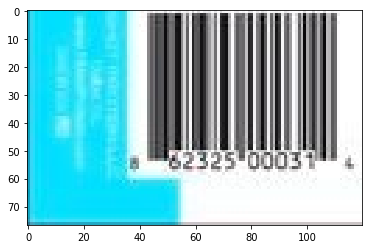

In [36]:
img = cv2.imread('img/81730.jpg')
#img = cv2.imread('img/sentry.jpg')

plt.imshow(img)

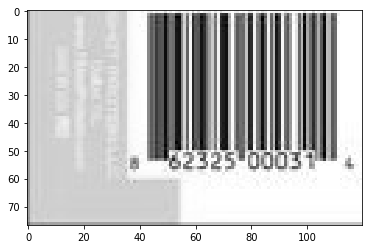

In [37]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')

In [38]:
decoded = pyzbar.decode(gray)

decoded

[]

0050428129647
EAN13


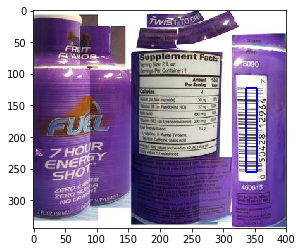

In [29]:
for d in decoded:
    print(d.data.decode('utf-8'))
    print(d.type)
    
    cv2.rectangle(img, (d.rect[0], d.rect[1]), (d.rect[0] + d.rect[2], d.rect[1] + d.rect[3]), (0, 0, 255), 2)
    
plt.imshow(img)

In [9]:
import pyzbar.pyzbar as pyzbar
import cv2
import matplotlib.pyplot as plt

#img = cv2.imread('img/bh_bar.jpg')
import tensorflow as tf
#file_path = tf.keras.utils.get_file('youtube.jpg', 'https://github.com/kairess/qrcode_barcode_detection/raw/master/img/bh_bar.jpg')
file_path = tf.keras.utils.get_file('sentry.jpg', 'img/sentry.jpg')
img = cv2.imread(file_path)

plt.imshow(img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')

decoded = pyzbar.decode(gray)

decoded #[Decoded(data=b'bbanghyong', type='CODE128', rect=Rect(left=19, top=10, width=140, height=17), polygon=[Point(x=19, y=11), Point(x=19, y=27), Point(x=159, y=26), Point(x=159, y=10)])]

for d in decoded:
    print(d.data.decode('utf-8'))
    print(d.type)

    cv2.rectangle(img, (d.rect[0], d.rect[1]), (d.rect[0] + d.rect[2], d.rect[1] + d.rect[3]), (0, 0, 255), 2)

plt.imshow(img)

ValueError: unknown url type: 'img/sentry.jpg'

In [1]:
import zbar
import Image

scanner = zbar.ImageScanner()

scanner.parse_config('enable')

img = Image.open("br.png").convert('L')
width, height = img.size
stream = zbar.Image(width, height, 'Y800', img.tostring())

scanner.scan(stream)

for symbol in stream:
    print('decoded', symbol.type, 'symbol', '"%s"' % symbol.data)

ModuleNotFoundError: No module named 'zbar'

In [1]:
import pyzbar.pyzbar as pyzbar
import cv2

cap = cv2.VideoCapture(0)

i = 0
while(cap.isOpened()):
  ret, img = cap.read()

  if not ret:
    continue

  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
     
  decoded = pyzbar.decode(gray)

  for d in decoded: 
    x, y, w, h = d.rect

    barcode_data = d.data.decode("utf-8")
    barcode_type = d.type

    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

    text = '%s (%s)' % (barcode_data, barcode_type)
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 255), 2, cv2.LINE_AA)

  cv2.imshow('img', img)

  key = cv2.waitKey(1)
  if key == ord('q'):
    break
  elif key == ord('s'):
    i += 1
    cv2.imwrite('c_%03d.jpg' % i, img)

cap.release()
cv2.destroyAllWindows()